In [2]:
import scipy as st
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr
from scipy.stats import pointbiserialr
from scipy.stats import spearmanr

import matplotlib as mpl
import numpy as np 
import pandas as pd
import glob
import os

#visuals
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [3]:
#HbA1c CSV CONVERSION + MERGE
a1c_df = pd.read_sas(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\xpt_raw_data\GHB_L.xpt', format='xport')
a1c_df.to_csv(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\csv_converted_data\hba1c.csv', index=False)
#Insulin CSV CONVERSION + MERGE
insulin_df = pd.read_sas(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\xpt_raw_data\INS_L.xpt', format='xport')
insulin_df.to_csv(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\csv_converted_data\insulin.csv', index=False)
#HDL_L CSV CONVERSION + MERGE
hdl_df = pd.read_sas(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\xpt_raw_data\HDL_L.xpt', format='xport')
hdl_df.to_csv(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\csv_converted_data\hdl.csv', index=False)
#Cholesterol CSV CONVERSION + MERGE
cholesterol_df = pd.read_sas(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\xpt_raw_data\TCHOL_L.xpt', format='xport')
cholesterol_df.to_csv(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\csv_converted_data\cholesterol.csv', index=False)


#Blood Pressure CSV CONVERSION + MERGE
bp_df = pd.read_sas(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\xpt_raw_data\BPXO_L.xpt', format='xport')
bp_df.to_csv(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\csv_converted_data\blood_pressure.csv', index=False)
#BMI CSV CONVERSION + MERGE
bmi_df = pd.read_sas(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\xpt_raw_data\BMX_L.xpt', format='xport')
bmi_df.to_csv(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\csv_converted_data\bmi.csv', index=False)


#Alcohol Use CSV CONVERSION + MERGE
alcohol_df = pd.read_sas(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\xpt_raw_data\ALQ_L.xpt', format='xport')
alcohol_df.to_csv(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\csv_converted_data\alcohol_use.csv', index=False)
#Smoking CSV CONVERSION + MERGE
smoking_df = pd.read_sas(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\xpt_raw_data\SMQ_L.xpt', format='xport')
smoking_df.to_csv(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\csv_converted_data\smoking.csv', index=False)
#Depression CSV CONVERSION + MERGE
depression_df = pd.read_sas(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\xpt_raw_data\DPQ_L.xpt', format='xport')
depression_df.to_csv(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\csv_converted_data\depression.csv', index=False)

In [4]:
#combine it
csv_files = glob.glob(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\csv_converted_data\*.csv')
df_list = [pd.read_csv(file) for file in csv_files]
merged_df = df_list[0]
for df in df_list[1:]:
    merged_df = pd.merge(merged_df, df, on='SEQN', how='outer')
#export merged dataframe to csv
merged_df.to_csv(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\merged_data\merged_health_data.csv', index=False)


### (0.1) EXPLORING DATA

In [5]:
merged_df.head(15)

,SEQN,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ151,ALQ170,BPAOARM,...,LBDINSI,LBDINLC,SMQ020,SMQ040,SMD641,SMD650,SMD100MN,SMQ621,SMD630,SMAQUEX2
0,130378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'R',...,93.18,5.397605e-79,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0
1,130379.0,1.0,2.000000e+00,3.0,5.397605e-79,NaN,NaN,2.0,NaN,b'R',...,119.46,5.397605e-79,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0
2,130380.0,1.0,1.000000e+01,1.0,5.397605e-79,NaN,NaN,2.0,NaN,b'R',...,97.98,5.397605e-79,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,130381.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,130384.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,130385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,130386.0,1.0,4.000000e+00,2.0,1.000000e+01,5.397605e-79,1.000000e+01,2.0,5.397605e-79,b'R',...,68.28,5.397605e-79,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0
8,130387.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,2.0,NaN,b'R',...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,130388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'R',...,NaN,NaN,1.0,1.0,NaN,6.0,1.000000e+00,NaN,NaN,1.0


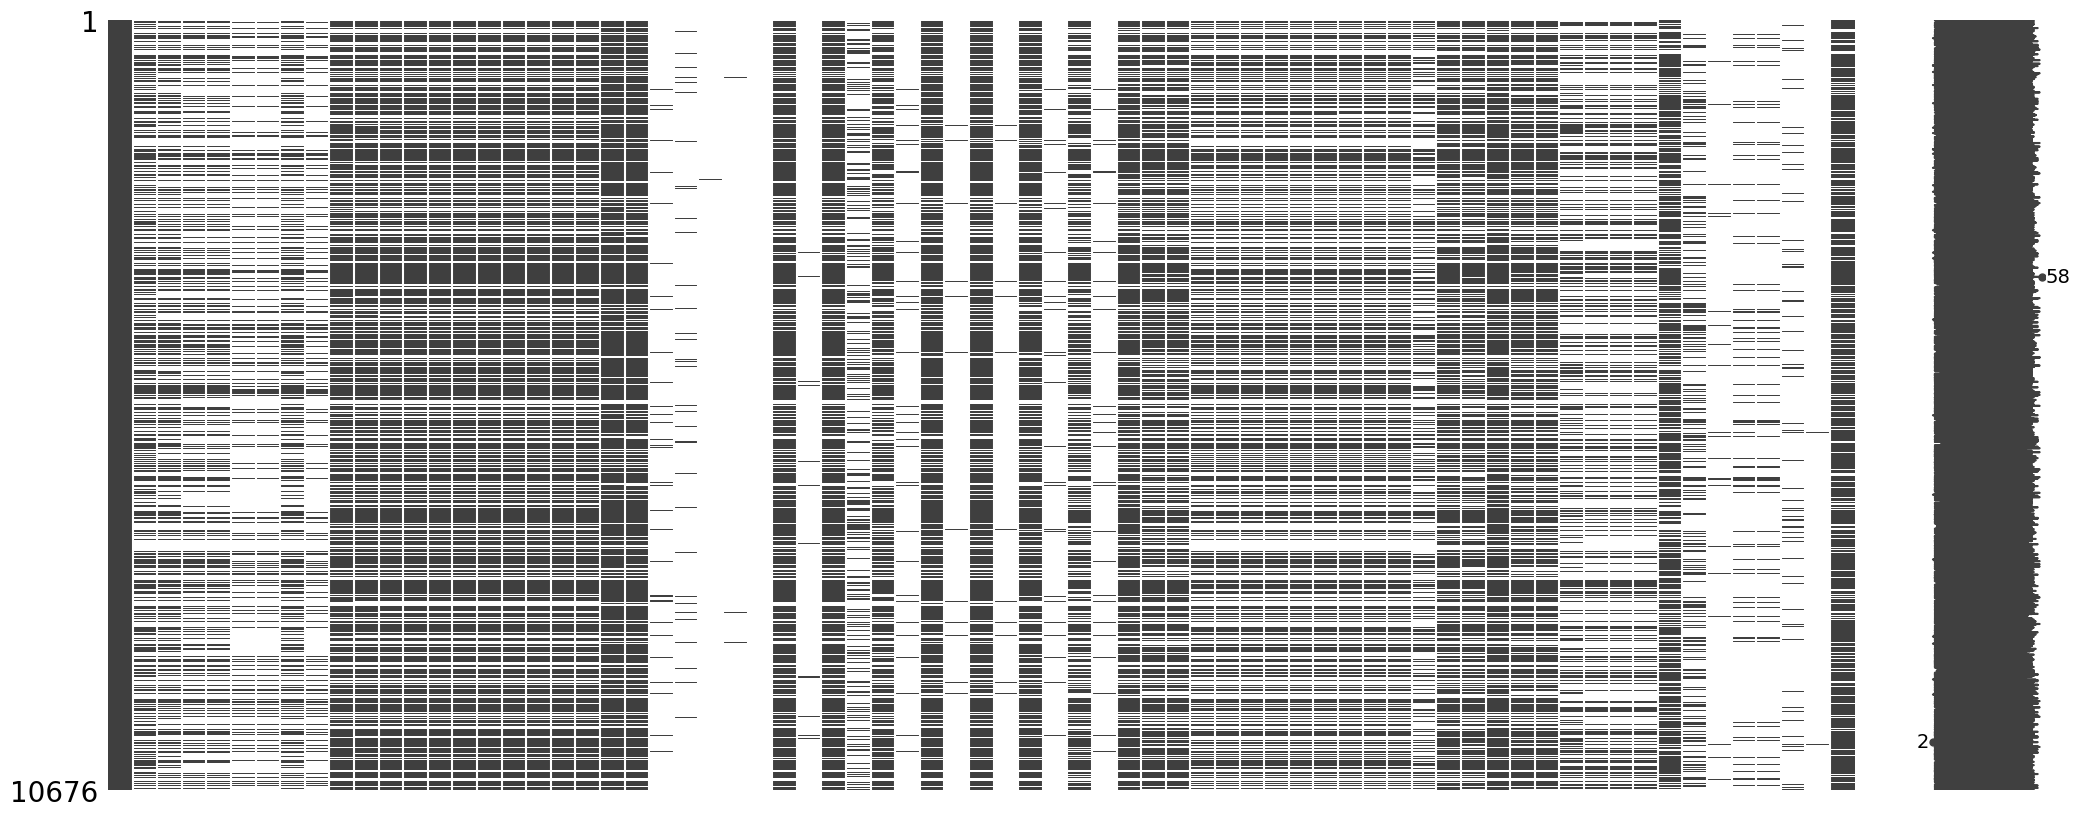

In [6]:
msno.matrix(merged_df)
plt.show()

### (0.2) TREATING DATA; REMOVING & RENAMING NHANES COLUMNS

##### NHANES has a really painstaking way of making it hard to read columns because of its weirdly overcomplicated naming system

##### My combined database has around ~83 columns. Below are the removed columns because they possess no value to the project:


In [7]:
treated_df = merged_df.copy()
treated_df.to_csv(r'C:\Users\kingw\Documents\PYTHON\diabetes+130-us+hospitals+for+years+1999-2008\merged_data\treated_health_data.csv', index=False) 
       
treated_df.drop(columns=['SEQN','WTSAF2YR','LBDINSI','WTPH2YR_x','WTPH2YR_y','WTPH2YR','LBDINLC','LBDHDDSI','LBDTCSI','LBXIN',
                         'BPAOARM','BPAOCSZ','BPXOSY2','BPXODI2','BPXOSY3','BPXODI3','BPXOPLS2','BPXOPLS3','BMDSTATS',
                         'BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMIWT', 'BMXBMI', 'BMDBMIC','BMIHT',
                        'BMXLEG','BMILEG','BMXARML','BMIARML','BMXARMC','BMIARMC','BMXWAIST', 'BMIWAIST', 'BMXHIP', 'BMIHIP',
                        'ALQ121','ALQ130','ALQ142','ALQ270','ALQ280','ALQ151','ALQ170',
                        'SMQ020','SMD650','SMD641','SMD650','SMD100MN','SMQ621','SMD630','SMAQUEX2',
                        'DPQ010','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090','DPQ100',], inplace=True)

treated_df = treated_df.rename(columns={
    'ALQ111': 'Ever_Used_Alcohol',
    'BPXOSY1': 'Systolic_BP_1',
    'BPXODI1': 'Diastolic_BP_1',
    'BPXOPLS1': 'Pulse_Rate_1',
    'BMXWT': 'Weight_kg',
    'BMXHT': 'Height_cm',
    'LBXTC': 'Total_Cholesterol',
    'DPQ020': 'Depression_Frequency',
    'LBXGH': 'HbA1c',
    'LBDHDD': 'HDL_Cholesterol',
    'SMQ040': 'Current_Smoker',
    })
treated_df.head(15)




,Ever_Used_Alcohol,Systolic_BP_1,Diastolic_BP_1,Pulse_Rate_1,Weight_kg,Height_cm,Total_Cholesterol,Depression_Frequency,HbA1c,HDL_Cholesterol,Current_Smoker
0,NaN,135.0,98.0,82.0,86.9,179.5,264.0,NaN,5.6,45.0,3.0
1,1.0,121.0,84.0,72.0,101.8,174.2,214.0,5.397605e-79,5.6,60.0,3.0
2,1.0,111.0,79.0,84.0,69.4,152.9,187.0,5.397605e-79,6.2,49.0,NaN
3,NaN,NaN,NaN,NaN,34.3,120.1,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,13.6,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,110.0,72.0,59.0,90.6,173.3,183.0,5.397605e-79,5.1,46.0,3.0
8,1.0,143.0,76.0,80.0,103.5,155.9,203.0,5.397605e-79,5.9,42.0,NaN
9,NaN,130.0,95.0,76.0,123.7,168.2,NaN,NaN,4.9,NaN,1.0


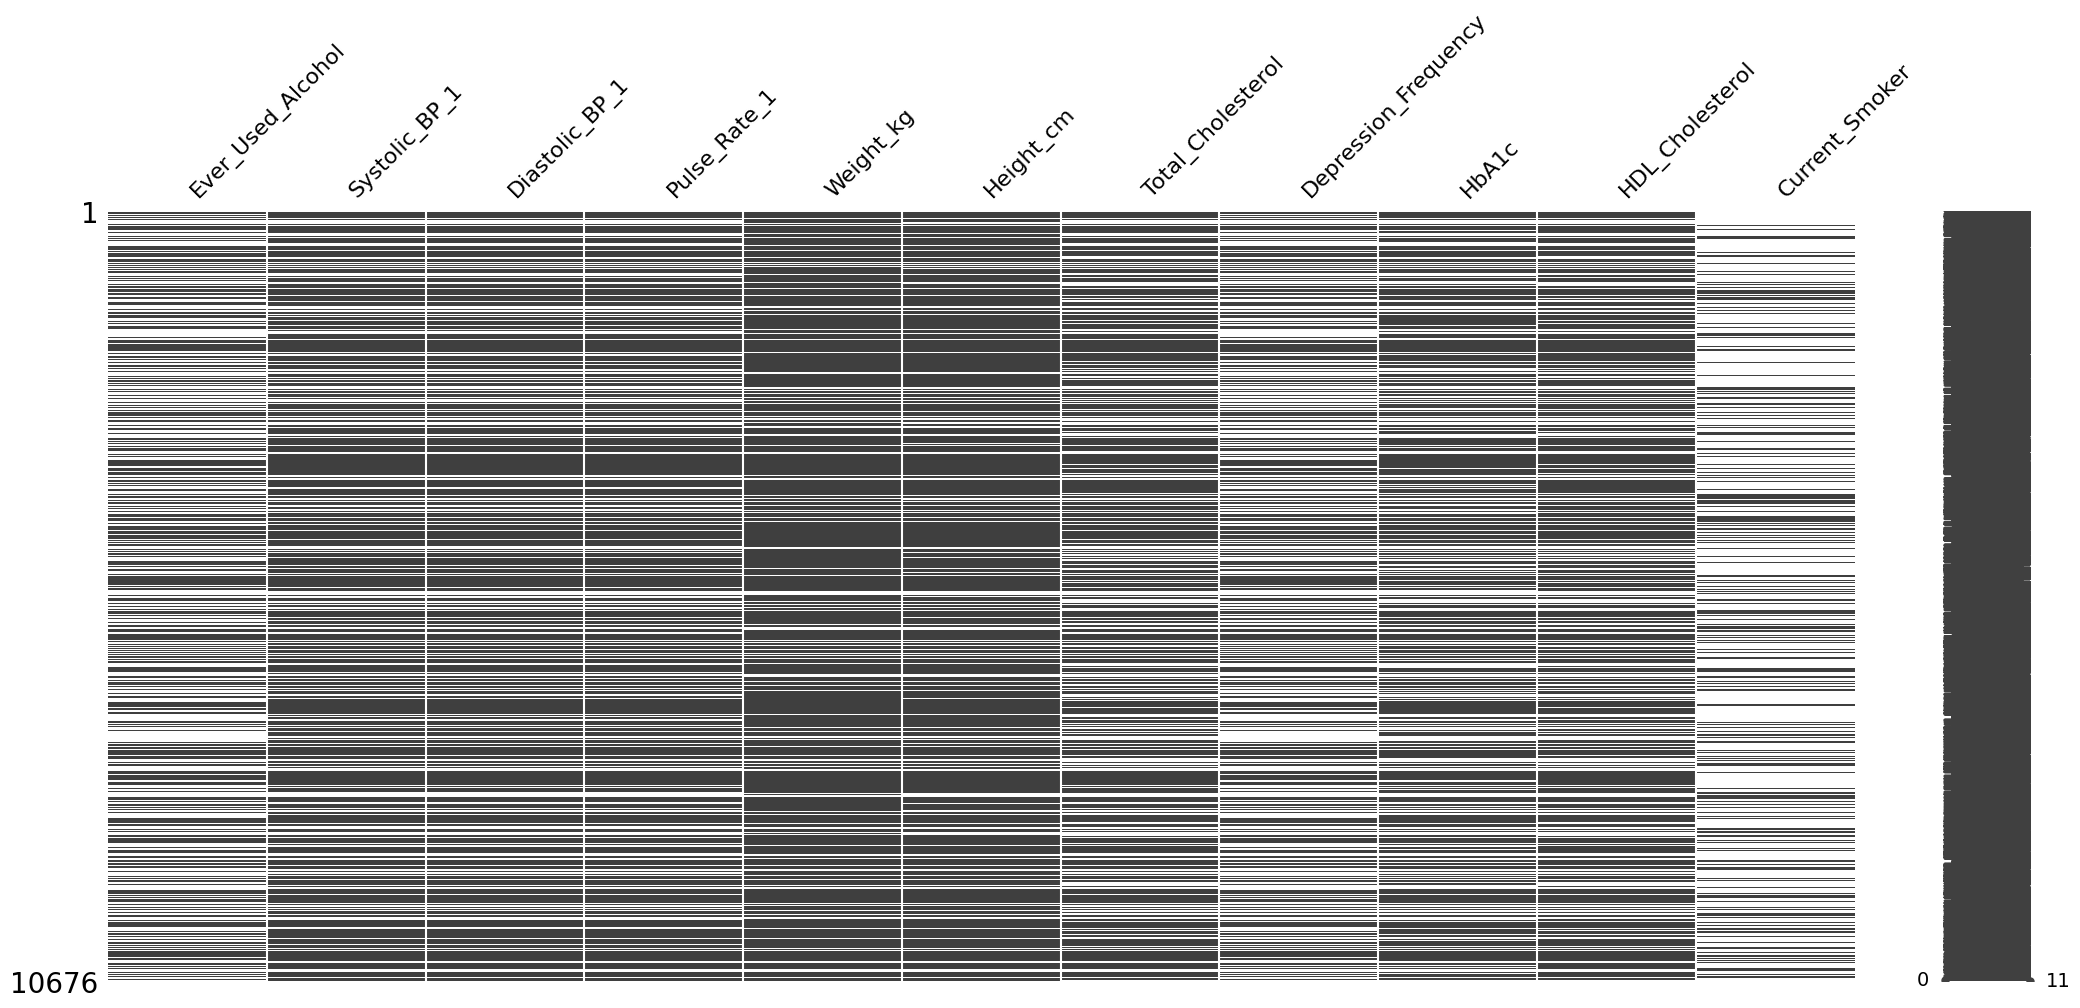

In [8]:
msno.matrix(treated_df)
plt.show()

In [9]:
#height & weight, alcohol, depression, & smoking treatment
fill_values = {
    'Height_cm': treated_df['Height_cm'].mean(),
    'Weight_kg': treated_df['Weight_kg'].mean(),
    'Ever_Used_Alcohol': treated_df['Ever_Used_Alcohol'].mode().iat[0],
    'Depression_Frequency': treated_df['Depression_Frequency'].mode().iat[0],
    'Current_Smoker': treated_df['Current_Smoker'].fillna(0),
}
treated_df['Depression_Frequency'] = treated_df['Depression_Frequency'].fillna(0)
treated_df = treated_df[treated_df["Depression_Frequency"].isin([0, 1, 2, 3])] # removing refused & don't know responses because they make up < 0.05% of data
treated_df.fillna(fill_values, inplace=True)

#remove target variables with missing values
treated_df.dropna(subset=['HbA1c',], inplace=True)

#imputing systolic,diastolic,pulse, cholestrol, & hdl with median values because of skewed distributions
fill_vitals = {
    'Systolic_BP_1': treated_df['Systolic_BP_1'].median(),
    'Diastolic_BP_1': treated_df['Diastolic_BP_1'].median(),
    'Pulse_Rate_1': treated_df['Pulse_Rate_1'].median(),
    'Total_Cholesterol': treated_df['Total_Cholesterol'].median(),
    'HDL_Cholesterol': treated_df['HDL_Cholesterol'].median(),
}
treated_df.fillna(value=fill_vitals, inplace=True)

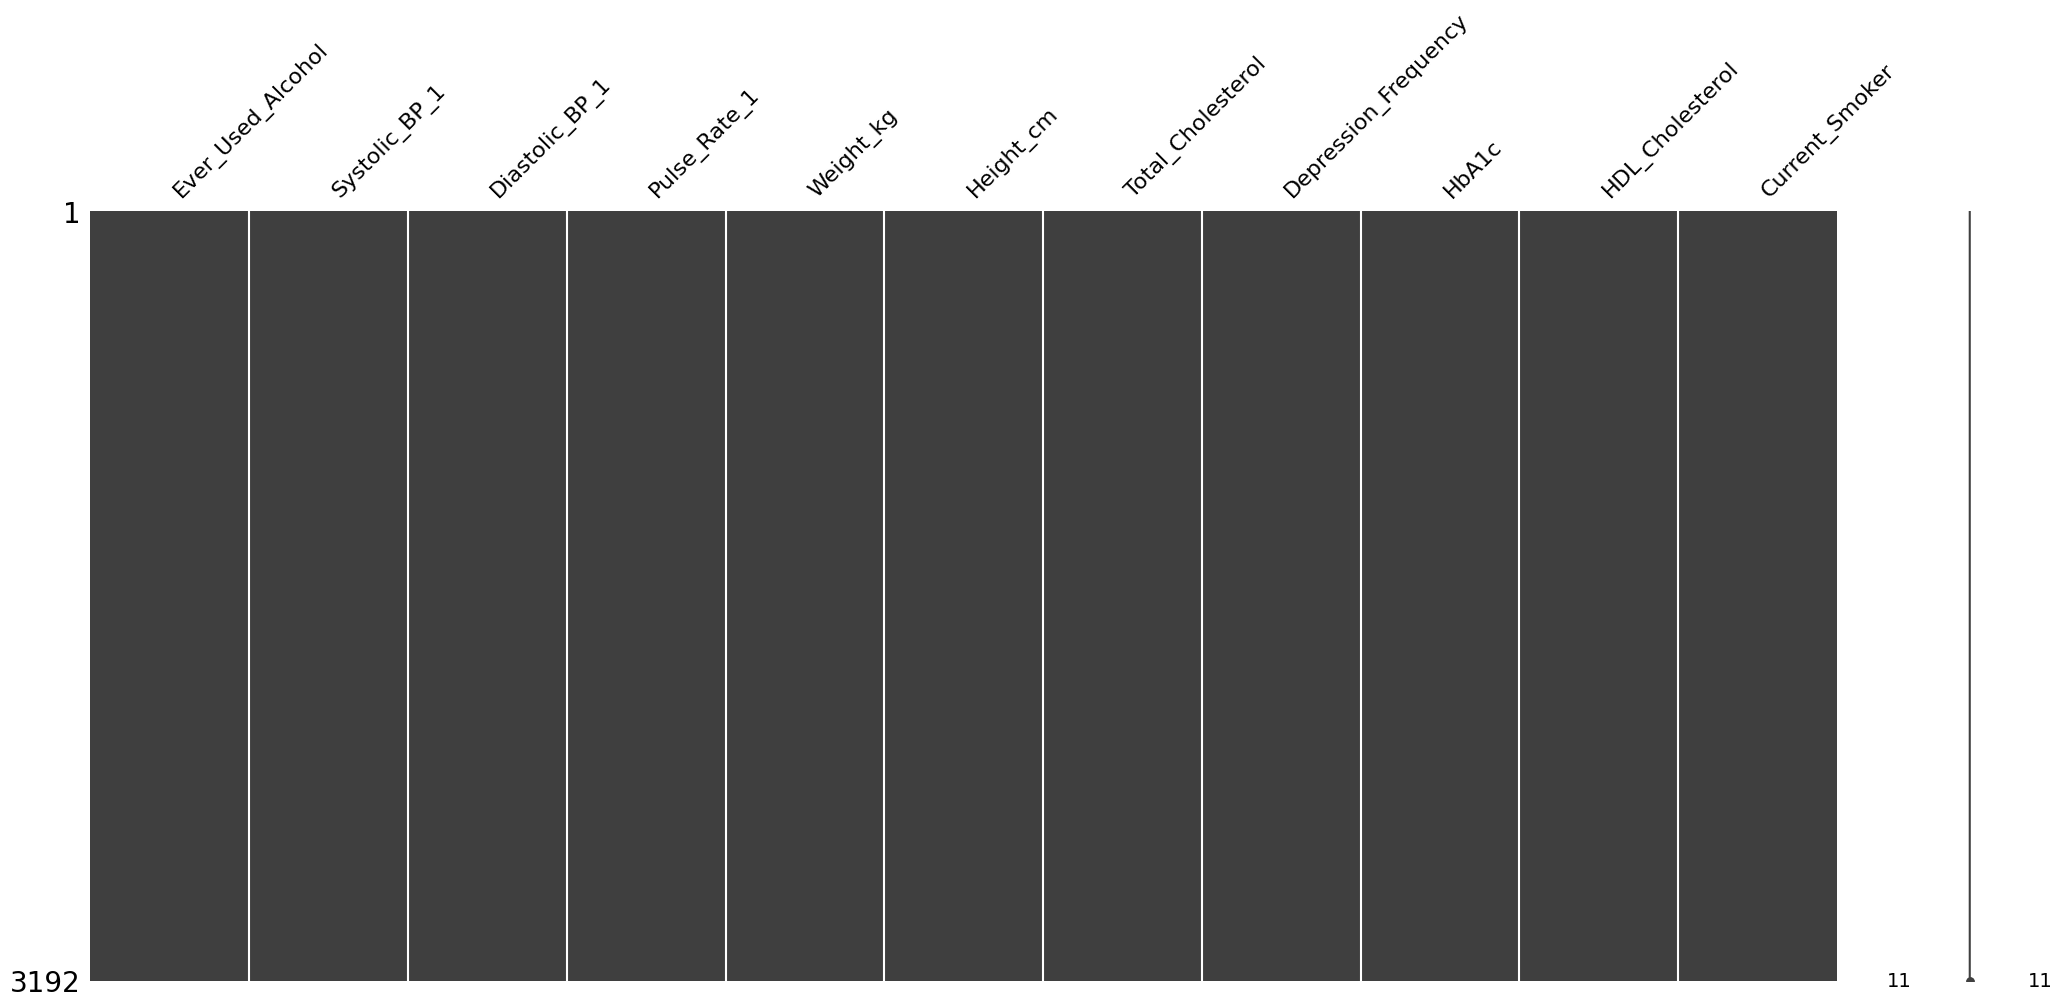

In [10]:
msno.matrix(treated_df)
plt.show()

#### (1.0) Exploratory phase of data

In [11]:
treated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3192 entries, 0 to 10670
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ever_Used_Alcohol     3192 non-null   float64
 1   Systolic_BP_1         3192 non-null   float64
 2   Diastolic_BP_1        3192 non-null   float64
 3   Pulse_Rate_1          3192 non-null   float64
 4   Weight_kg             3192 non-null   float64
 5   Height_cm             3192 non-null   float64
 6   Total_Cholesterol     3192 non-null   float64
 7   Depression_Frequency  3192 non-null   float64
 8   HbA1c                 3192 non-null   float64
 9   HDL_Cholesterol       3192 non-null   float64
 10  Current_Smoker        3192 non-null   float64
dtypes: float64(11)
memory usage: 299.2 KB


In [12]:
#changing data types & removing scientific notation min values
treated_df['Ever_Used_Alcohol'] = treated_df['Ever_Used_Alcohol'].astype('int')
treated_df['Depression_Frequency'] = treated_df['Depression_Frequency'].astype('int')
treated_df['Current_Smoker'] = treated_df['Current_Smoker'].astype('int')
treated_df['Systolic_BP_1'] = treated_df['Systolic_BP_1'].astype('int')
treated_df['Diastolic_BP_1'] = treated_df['Diastolic_BP_1'].astype('int')
treated_df['Pulse_Rate_1'] = treated_df['Pulse_Rate_1'].astype('int')
treated_df['Height_cm'] = treated_df['Height_cm'].astype('float').round(2)
treated_df['Weight_kg'] = treated_df['Weight_kg'].astype('float').round(2)

In [13]:
treated_df.describe()

,Ever_Used_Alcohol,Systolic_BP_1,Diastolic_BP_1,Pulse_Rate_1,Weight_kg,Height_cm,Total_Cholesterol,Depression_Frequency,HbA1c,HDL_Cholesterol,Current_Smoker
count,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000
mean,1.051692,117.990288,72.520677,72.957080,79.078008,165.631510,177.872494,0.751880,5.667168,53.100877,0.752193
std,0.318878,18.119737,11.920643,12.225874,23.888508,9.995887,41.255664,0.855877,1.103736,12.993014,1.183955
min,1.000000,61.000000,34.000000,35.000000,24.700000,131.300000,63.000000,0.000000,3.200000,25.000000,0.000000
25%,1.000000,106.000000,64.000000,65.000000,61.675000,158.700000,149.000000,0.000000,5.200000,44.000000,0.000000
50%,1.000000,115.000000,72.000000,72.000000,74.700000,164.900000,174.000000,1.000000,5.400000,51.000000,0.000000
75%,1.000000,127.000000,79.000000,80.000000,92.225000,172.500000,199.000000,1.000000,5.700000,60.000000,1.000000
max,9.000000,224.000000,142.000000,129.000000,222.700000,200.700000,438.000000,3.000000,17.100000,127.000000,3.000000


In [14]:
#display max & min values for columns

max_min_df = treated_df.copy()
def max_min(df):
    min_values = df.min()
    max_values = df.max()
    value_counts = df.value_counts()
    min_max = pd.DataFrame({'min': min_values, 'max': max_values,})
    return min_max

summary = max_min(max_min_df)
summary

,min,max
Ever_Used_Alcohol,1.0,9.0
Systolic_BP_1,61.0,224.0
Diastolic_BP_1,34.0,142.0
Pulse_Rate_1,35.0,129.0
Weight_kg,24.7,222.7
Height_cm,131.3,200.7
Total_Cholesterol,63.0,438.0
Depression_Frequency,0.0,3.0
HbA1c,3.2,17.1
HDL_Cholesterol,25.0,127.0


#### (1.1) Alcohol usage exploration

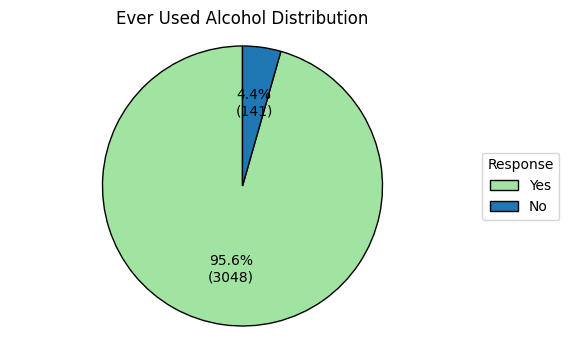

In [15]:
#dropping (9; don't know) values from ever used alcohol column
treated_df = treated_df[treated_df['Ever_Used_Alcohol'] != 9]

#pie chart of ever used alcohol (1=yes, 2=no)

codes = {1: "Yes", 2: "No"}
colors = ["#55cf558d", "#1f77b4", "#ff7f0e"]

Alcohol = treated_df["Ever_Used_Alcohol"].map(codes)
alcohol_counts = Alcohol.value_counts()
labels = alcohol_counts.index.tolist()

fig, ax = plt.subplots(figsize=(6, 4))
wedges, texts, autotexts = ax.pie(
    alcohol_counts,
    labels=None,
    autopct=lambda p: f"{p:.1f}%\n({int(round(p*sum(alcohol_counts)/100))})",
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

ax.legend(
    wedges,
    labels,
    title="Response",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

ax.set_title("Ever Used Alcohol Distribution")
ax.axis("equal")
plt.show()



#### (1.2) Smoking usage exploration

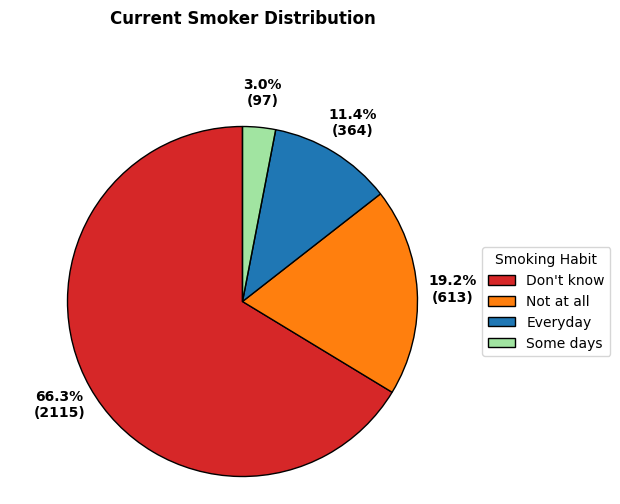

In [ ]:
#pie chart of smoking habit(0=don't know, 1 = everyday, 2 = some days, 3 = not at all)
codes = {0: "Don't know", 1: "Everyday", 2: "Some days", 3: "Not at all"}
colors = ["#d62728", "#ff7f0e", "#1f77b4", "#55cf558d"]
Smoking = treated_df["Current_Smoker"].map(codes)
smoking_counts = Smoking.value_counts()
labels = smoking_counts.index.tolist()
fig, ax = plt.subplots(figsize=(6, 5))
wedges, texts, autotexts = ax.pie(
    smoking_counts,
    labels=None,
    autopct=lambda p: f"{p:.1f}%\n({int(round(p*sum(smoking_counts)/100))})",
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize':10, 'color':'black', 'weight':'bold'},
    pctdistance=1.2,
    labeldistance=1.5
)

ax.legend(
    wedges,
    labels,
    title="Smoking Habit",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)
ax.set_title("Current Smoker Distribution", y=1.2, weight='bold')
ax.axis("equal")
plt.show()







#### (1.3) Depression frequency exploration

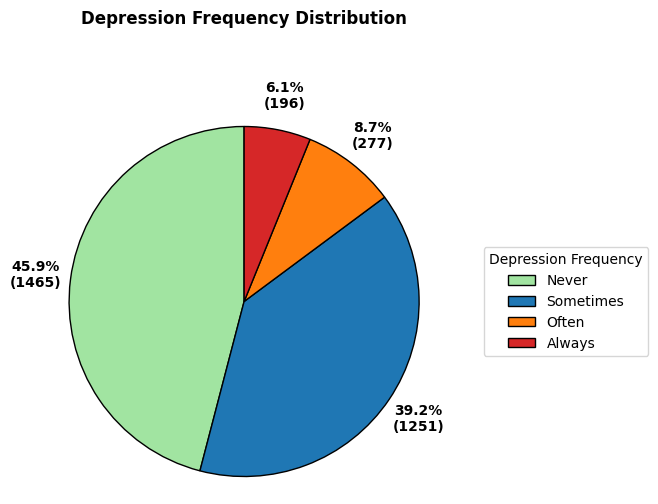

In [ ]:
#pie chart of depression frequency (0=never, 1=sometimes, 2=often, 3=always)
codes = {0: "Never", 1: "Sometimes", 2: "Often", 3: "Always"}
colors = ["#55cf558d", "#1f77b4", "#ff7f0e", "#d62728"]
Depression = treated_df["Depression_Frequency"].map(codes)
depression_counts = Depression.value_counts()
labels = depression_counts.index.tolist()
fig, ax = plt.subplots(figsize=(6, 5))
wedges, texts, autotexts = ax.pie(
    depression_counts,
    labels=None,
    autopct=lambda p: f"{p:.1f}%\n({int(round(p*sum(depression_counts)/100))})",
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize':10, 'color':'black', 'weight':'bold'},
    pctdistance=1.2,
    labeldistance=1.5
)
ax.legend(
    wedges,
    labels,
    title="Depression Frequency",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)
ax.set_title("Depression Frequency Distribution", y=1.2, weight='bold')
ax.axis("equal")
plt.show()

#

#### (1.4) Systolic BP exploration

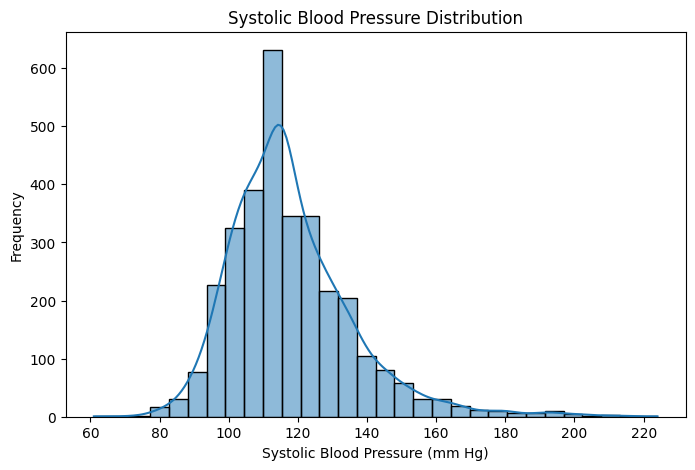

In [37]:
#histogram of systolic blood pressure
plt.figure(figsize=(8, 5))
sns.histplot(treated_df['Systolic_BP_1'], bins=30, kde=True, color='#1f77b4')
plt.title('Systolic Blood Pressure Distribution')
plt.xlabel('Systolic Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

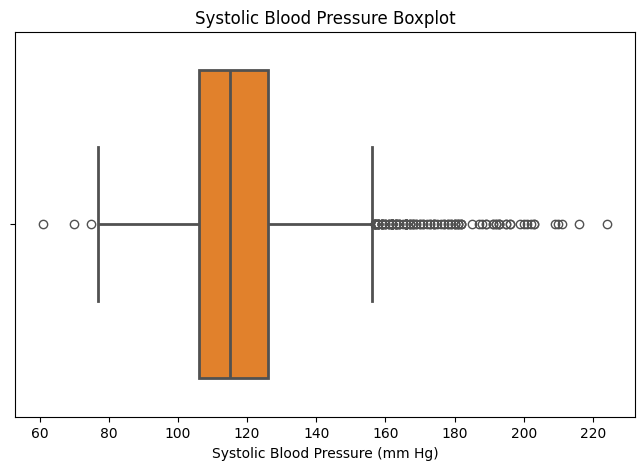

In [38]:
#subplot of systolic blood pressure
plt.figure(figsize=(8, 5))
sns.boxplot(x=treated_df['Systolic_BP_1'], linewidth=2, color='#ff7f0e')
plt.title('Systolic Blood Pressure Boxplot')
plt.xlabel('Systolic Blood Pressure (mm Hg)')
plt.show()

In [39]:
treated_df['Systolic_BP_1'].value_counts()

Systolic_BP_1
115    260
108     86
106     85
111     83
117     78
      ... 
210      1
175      1
185      1
211      1
200      1
Name: count, Length: 126, dtype: int64

#### (1.5) Diastolic BP exploration

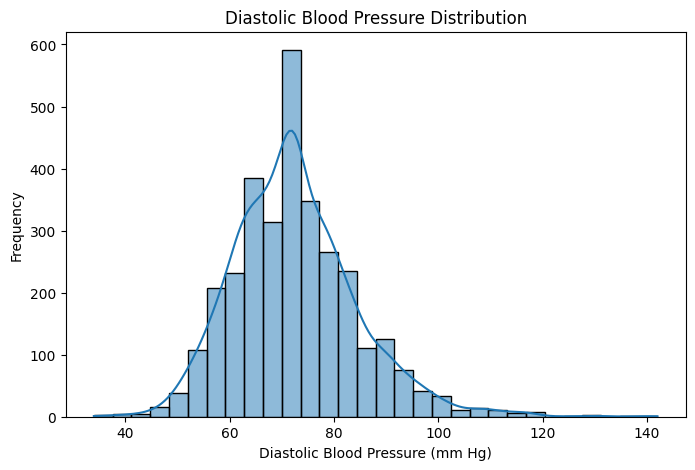

In [40]:
#histogram of diastolic blood pressure
plt.figure(figsize=(8, 5))
sns.histplot(treated_df['Diastolic_BP_1'], bins=30, kde=True, color='#1f77b4')
plt.title('Diastolic Blood Pressure Distribution')
plt.xlabel('Diastolic Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

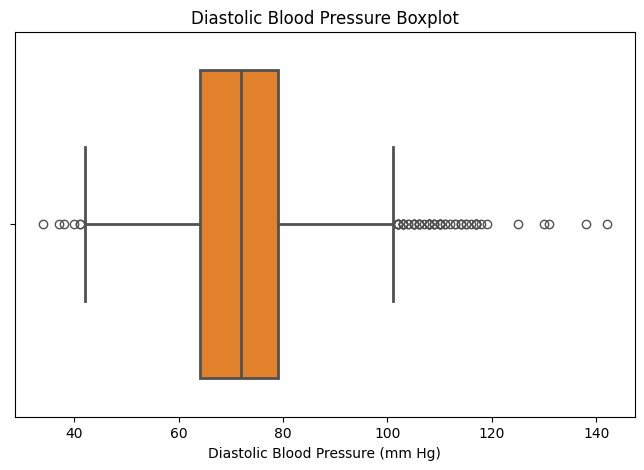

In [41]:
#subplot of diastolic blood pressure
plt.figure(figsize=(8, 5))
sns.boxplot(x=treated_df['Diastolic_BP_1'], linewidth=2, color='#ff7f0e')
plt.title('Diastolic Blood Pressure Boxplot')
plt.xlabel('Diastolic Blood Pressure (mm Hg)')
plt.show()

In [42]:
treated_df['Diastolic_BP_1'].value_counts()

Diastolic_BP_1
72     275
73     122
67     108
70     105
64     104
      ... 
34       1
107      1
131      1
119      1
138      1
Name: count, Length: 87, dtype: int64

#### (1.6) Pulse rate exploration

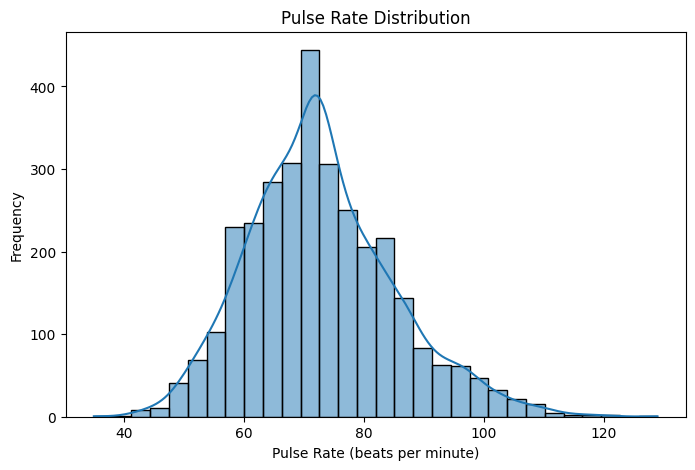

In [43]:
#histogram of pulse rate
plt.figure(figsize=(8, 5))
sns.histplot(treated_df['Pulse_Rate_1'], bins=30, kde=True, color='#1f77b4')
plt.title('Pulse Rate Distribution')
plt.xlabel('Pulse Rate (beats per minute)')
plt.ylabel('Frequency')
plt.show()

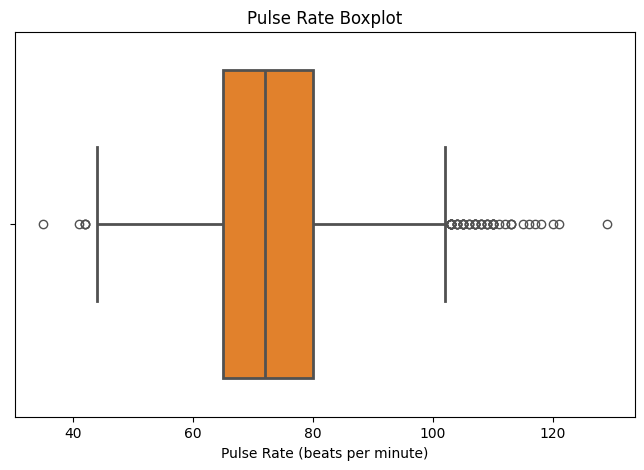

In [44]:
#subplot of pulse rate
plt.figure(figsize=(8, 5))
sns.boxplot(x=treated_df['Pulse_Rate_1'], linewidth=2, color='#ff7f0e')
plt.title('Pulse Rate Boxplot')
plt.xlabel('Pulse Rate (beats per minute)')
plt.show()

In [45]:
treated_df['Pulse_Rate_1'].value_counts()

Pulse_Rate_1
72     268
66     110
75     108
69     108
74     105
      ... 
35       1
112      1
116      1
41       1
117      1
Name: count, Length: 80, dtype: int64

#### (1.7) height & weight exploration

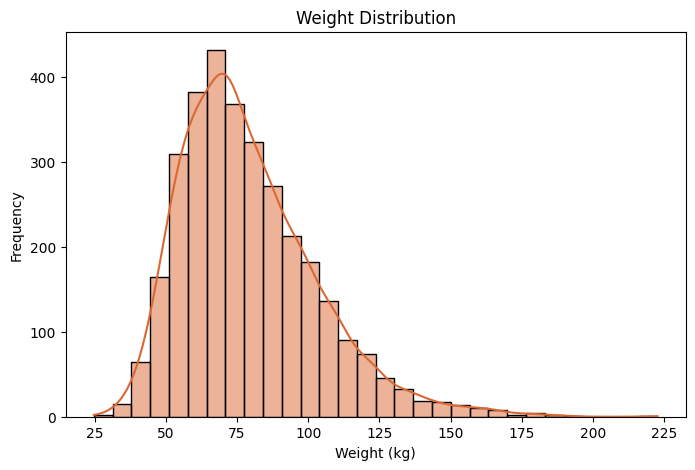

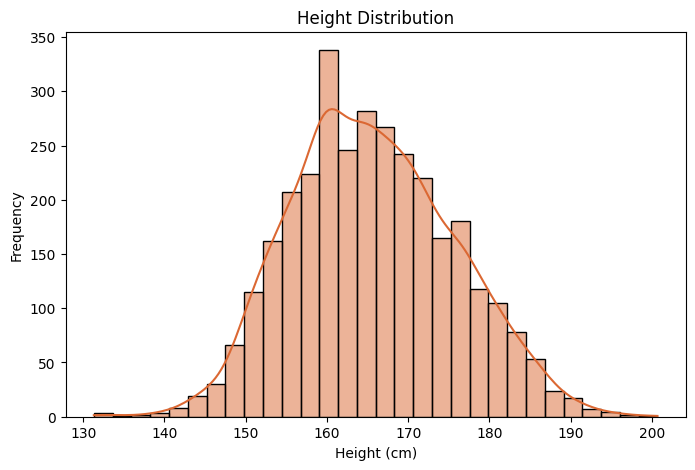

In [46]:
#histogram of weight & height
plt.figure(figsize=(8, 5))
sns.histplot(treated_df['Weight_kg'], bins=30, kde=True, color="#db6833")
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

#

plt.figure(figsize=(8, 5))
sns.histplot(treated_df['Height_cm'], bins=30, kde=True, color='#db6833')
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

#### (1.8) total & high density cholesterol exploration

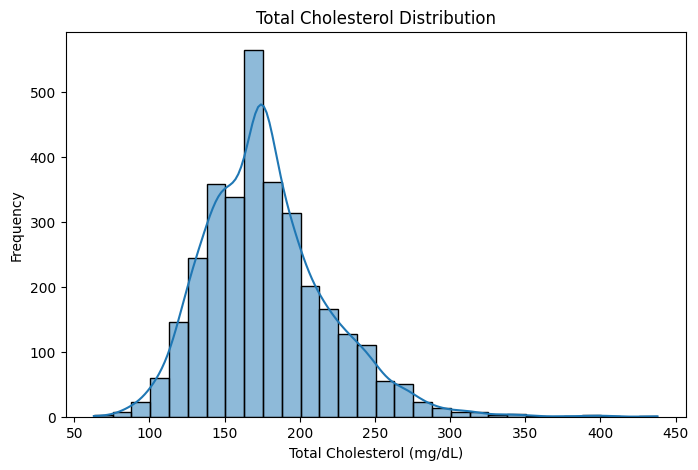

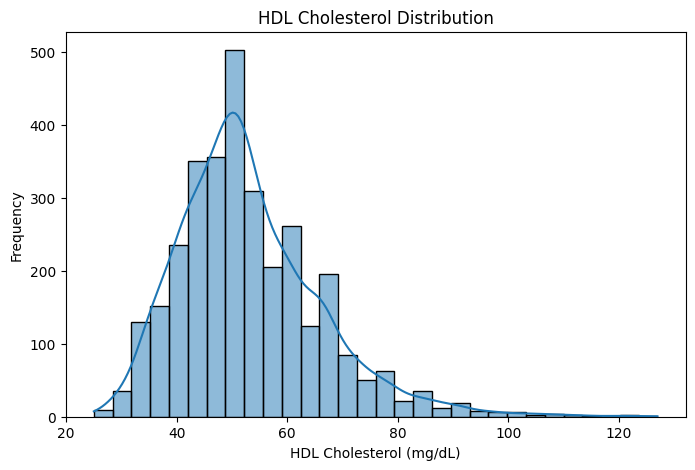

In [47]:
#total cholesterol & hdl histogram
treated_df['Total_Cholesterol'].describe()

plt.figure(figsize=(8, 5))
sns.histplot(treated_df['Total_Cholesterol'], bins=30, kde=True, color='#1f77b4')
plt.title('Total Cholesterol Distribution')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.show()



#hdl histogram
treated_df['HDL_Cholesterol'].describe()
plt.figure(figsize=(8, 5))
sns.histplot(treated_df['HDL_Cholesterol'], bins=30, kde=True, color='#1f77b4')
plt.title('HDL Cholesterol Distribution')
plt.xlabel('HDL Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.show()



#### (1.9) exploration of target variable HbA1c

In [48]:
#exploration of target variable HbA1c
treated_df['HbA1c'].describe()

count    3189.000000
mean        5.666259
std         1.102735
min         3.200000
25%         5.200000
50%         5.400000
75%         5.700000
max        17.100000
Name: HbA1c, dtype: float64

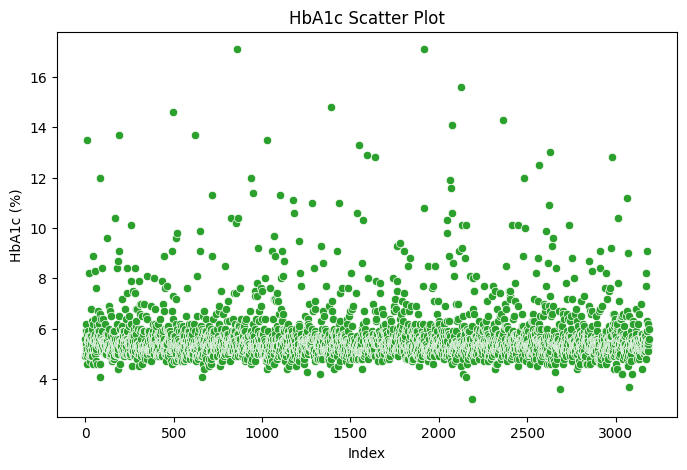

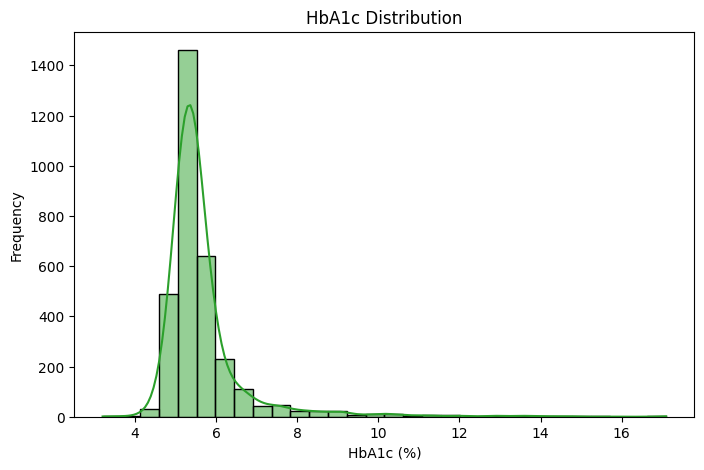

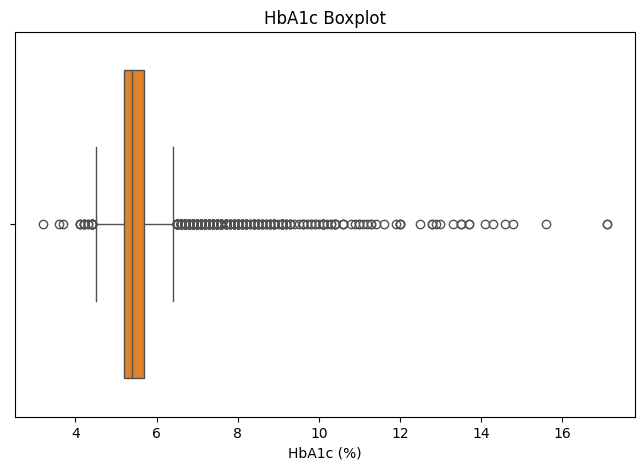

In [49]:
#hba1c scatter plot & histogram & boxplot
#scatter plot

treated_df = treated_df.reset_index(drop=True)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=treated_df.index, y=treated_df['HbA1c'], color='#2ca02c')
plt.title('HbA1c Scatter Plot')
plt.xlabel('Index')
plt.ylabel('HbA1c (%)')
plt.show()


#histogram
plt.figure(figsize=(8, 5))
sns.histplot(treated_df['HbA1c'], bins=30, kde=True, color='#2ca02c')
plt.title('HbA1c Distribution')
plt.xlabel('HbA1c (%)')
plt.ylabel('Frequency')
plt.show()

#boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=treated_df['HbA1c'], linewidth=1, color='#ff7f0e')
plt.title('HbA1c Boxplot')
plt.xlabel('HbA1c (%)')
plt.show()

#### 2.0 bivariate analysis between hba1c & all continious variables

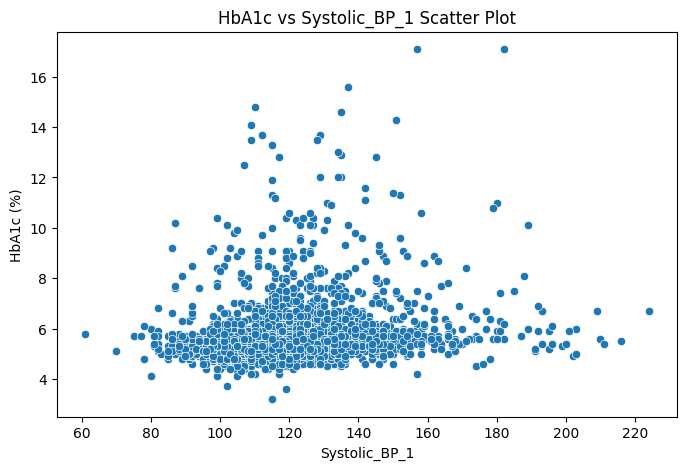

Pearson correlation between HbA1c and Systolic_BP_1: 0.2161


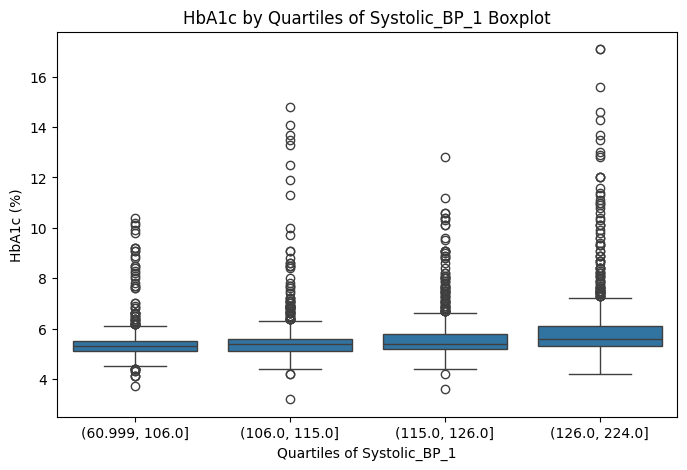

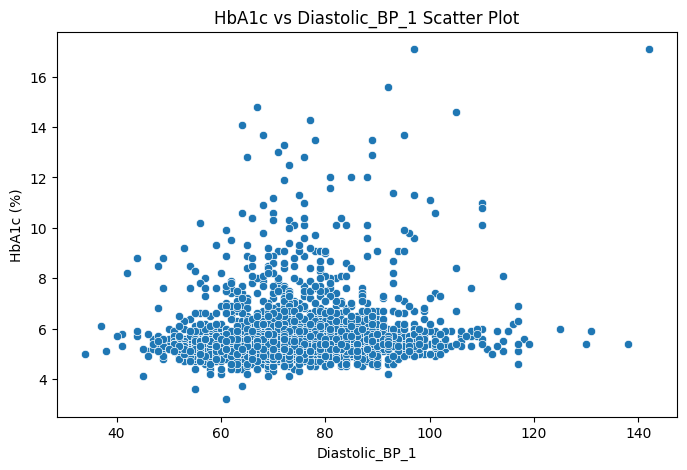

Pearson correlation between HbA1c and Diastolic_BP_1: 0.1599


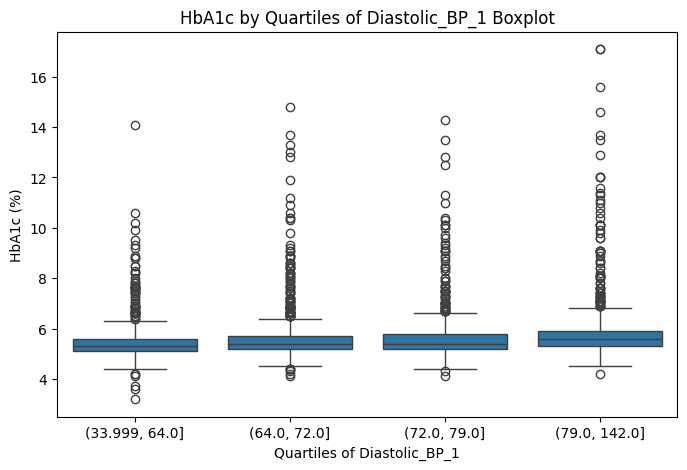

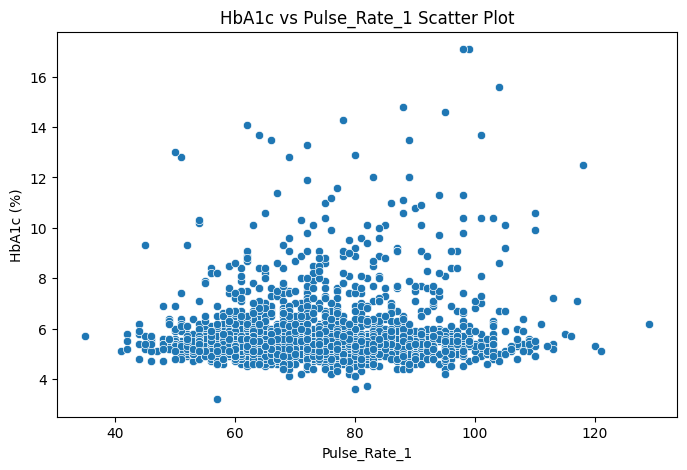

Pearson correlation between HbA1c and Pulse_Rate_1: 0.1033


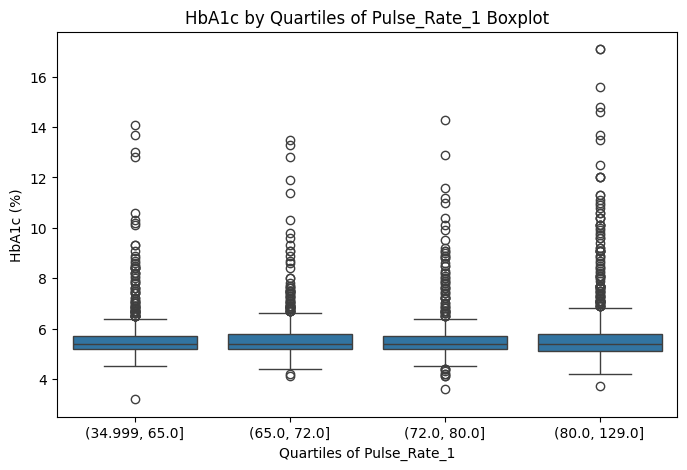

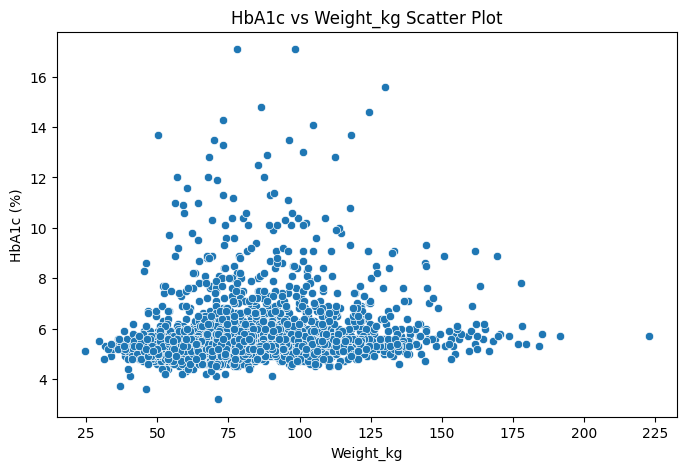

Pearson correlation between HbA1c and Weight_kg: 0.1832


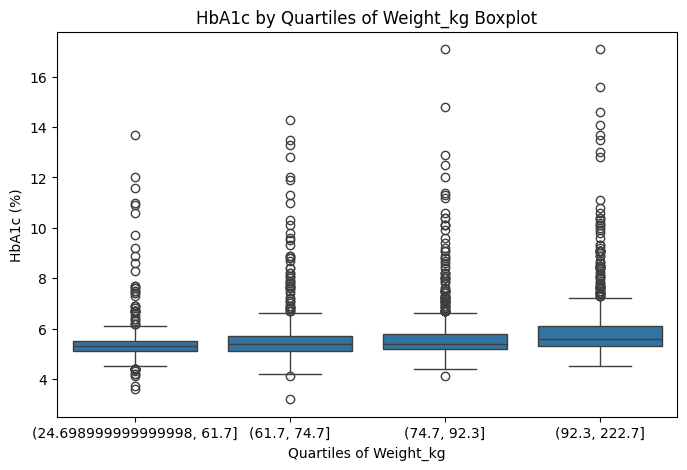

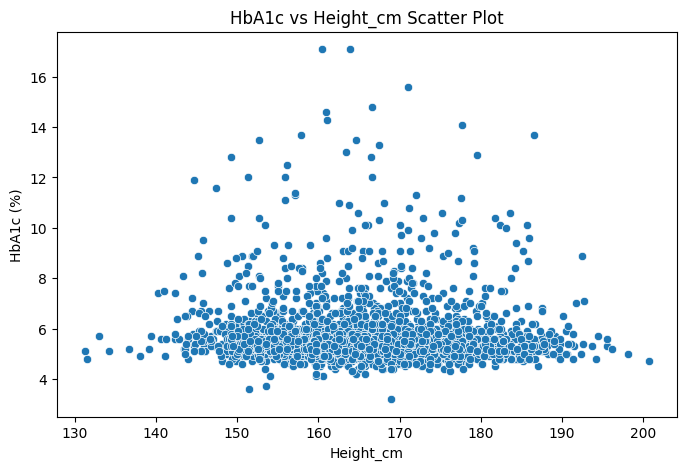

Pearson correlation between HbA1c and Height_cm: -0.0375


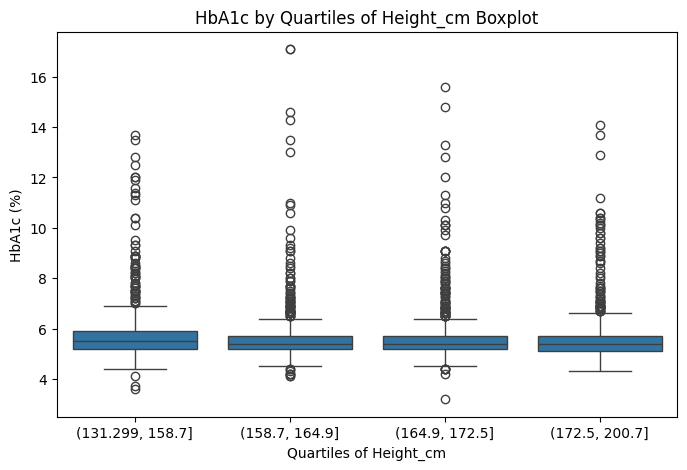

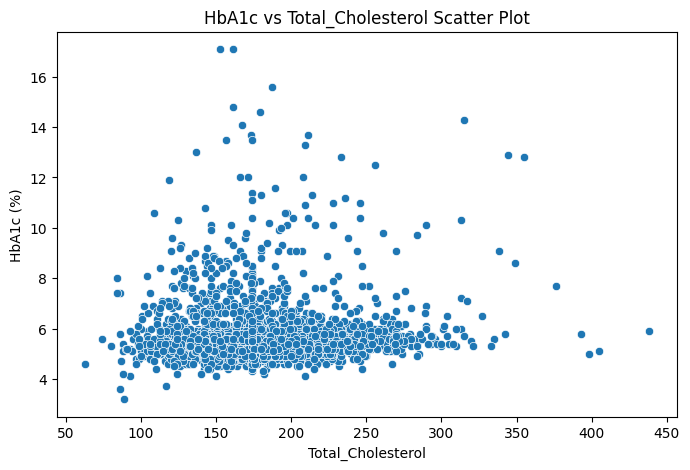

Pearson correlation between HbA1c and Total_Cholesterol: 0.0798


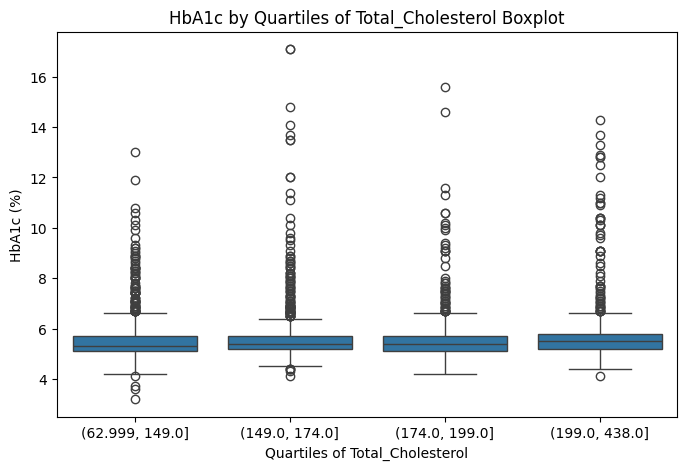

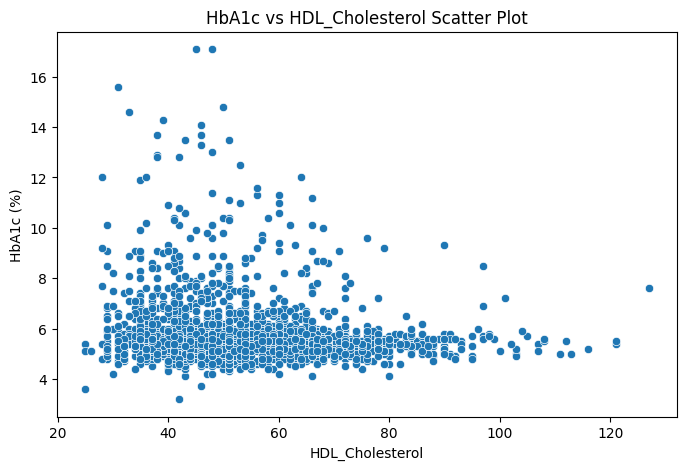

Pearson correlation between HbA1c and HDL_Cholesterol: -0.1274


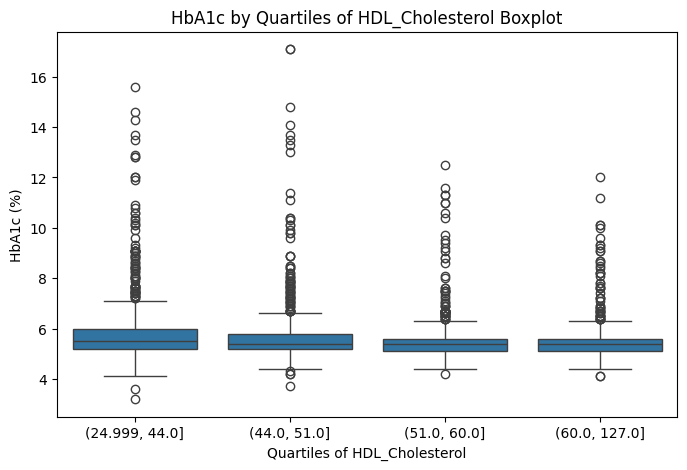

In [50]:
#bivariate analysis between hba1c & all continious variables (scatterplots & correlation coefficients & boxplots)
continuous_vars = ['Systolic_BP_1', 'Diastolic_BP_1', 'Pulse_Rate_1', 'Weight_kg', 'Height_cm', 'Total_Cholesterol', 'HDL_Cholesterol']
for var in continuous_vars:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=treated_df[var], y=treated_df['HbA1c'], color='#1f77b4')
    plt.title(f'HbA1c vs {var} Scatter Plot')
    plt.xlabel(var)
    plt.ylabel('HbA1c (%)')
    plt.show()
    
    corr, _ = pearsonr(treated_df[var], treated_df['HbA1c'])
    print(f'Pearson correlation between HbA1c and {var}: {corr:.4f}')
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=pd.qcut(treated_df[var], q=4, duplicates='drop'), y=treated_df['HbA1c'])
    plt.title(f'HbA1c by Quartiles of {var} Boxplot')
    plt.xlabel(f'Quartiles of {var}')
    plt.ylabel('HbA1c (%)')
    plt.show()
    

##### (2.1) bivariate analysis between hba1c & categorical variables

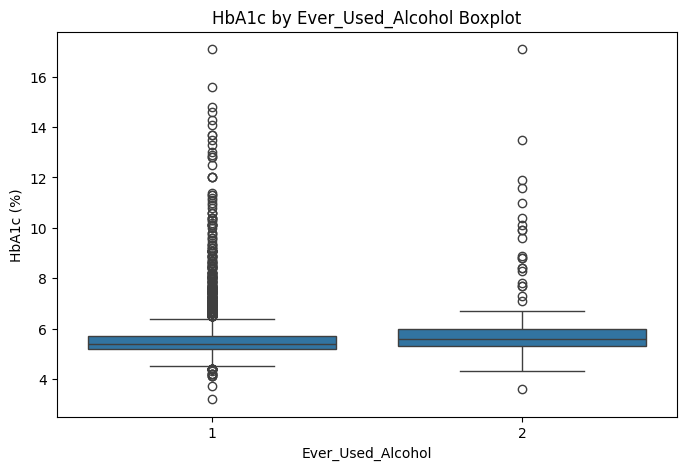

Point-biserial correlation between HbA1c and Ever_Used_Alcohol: 0.0870


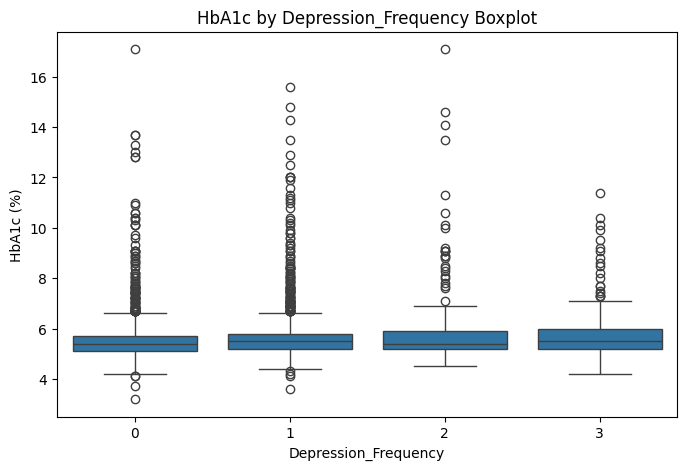

Point-biserial correlation between HbA1c and Depression_Frequency: 0.0863


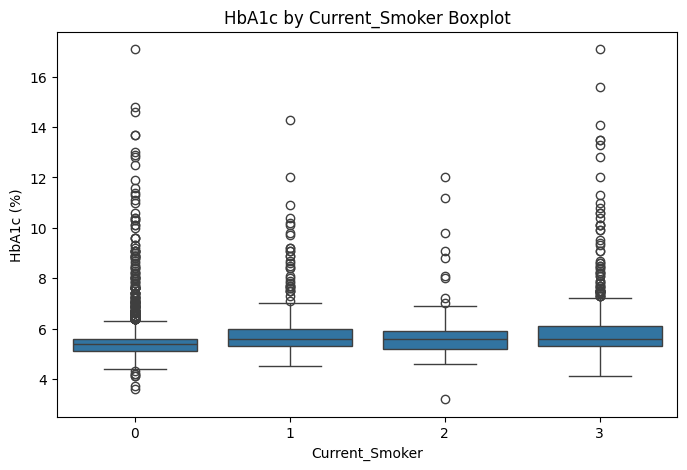

Point-biserial correlation between HbA1c and Current_Smoker: 0.1514


In [51]:
#hba1c bivariate analysis between hba1c & categorical variables (boxplots & point biserial correlation coefficients)
categorical_vars = ['Ever_Used_Alcohol', 'Depression_Frequency', 'Current_Smoker']
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=treated_df[var], y=treated_df['HbA1c'])
    plt.title(f'HbA1c by {var} Boxplot')
    plt.xlabel(var)
    plt.ylabel('HbA1c (%)')
    plt.show()
    
    corr, _ = pointbiserialr(treated_df[var], treated_df['HbA1c'])
    print(f'Point-biserial correlation between HbA1c and {var}: {corr:.4f}')


#### (2.2) statistical testing of hba1c & continous variables

In [52]:
#hypothesis testing of hba1c & continous variables (pearson correlation test, p values)
for var in continuous_vars:
    corr, p_value = pearsonr(treated_df[var], treated_df['HbA1c'])
    print(f'Pearson correlation test between HbA1c and {var}: correlation={corr:.4f}, p-value={p_value:.4e}')
    

Pearson correlation test between HbA1c and Systolic_BP_1: correlation=0.2161, p-value=5.0401e-35
Pearson correlation test between HbA1c and Diastolic_BP_1: correlation=0.1599, p-value=1.0444e-19
Pearson correlation test between HbA1c and Pulse_Rate_1: correlation=0.1033, p-value=5.0541e-09
Pearson correlation test between HbA1c and Weight_kg: correlation=0.1832, p-value=1.8362e-25
Pearson correlation test between HbA1c and Height_cm: correlation=-0.0375, p-value=3.4331e-02
Pearson correlation test between HbA1c and Total_Cholesterol: correlation=0.0798, p-value=6.3474e-06
Pearson correlation test between HbA1c and HDL_Cholesterol: correlation=-0.1274, p-value=5.0626e-13


#### (2.3) hypothesis testing of hba1c & categorical variables

In [53]:
#hypothesis testing of hba1c & categorical variables (ANOVA test)
for var in categorical_vars:
    groups = [treated_df['HbA1c'][treated_df[var] == level] for level in treated_df[var].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f'ANOVA test between HbA1c and {var}: F-statistic={f_stat:.4f}, p-value={p_value:.4e}')
    

ANOVA test between HbA1c and Ever_Used_Alcohol: F-statistic=24.2858, p-value=8.7287e-07
ANOVA test between HbA1c and Depression_Frequency: F-statistic=8.6905, p-value=9.6793e-06
ANOVA test between HbA1c and Current_Smoker: F-statistic=27.9849, p-value=7.3977e-18


#### (2.4) heatmap & correlation matrix between all continuous variables 

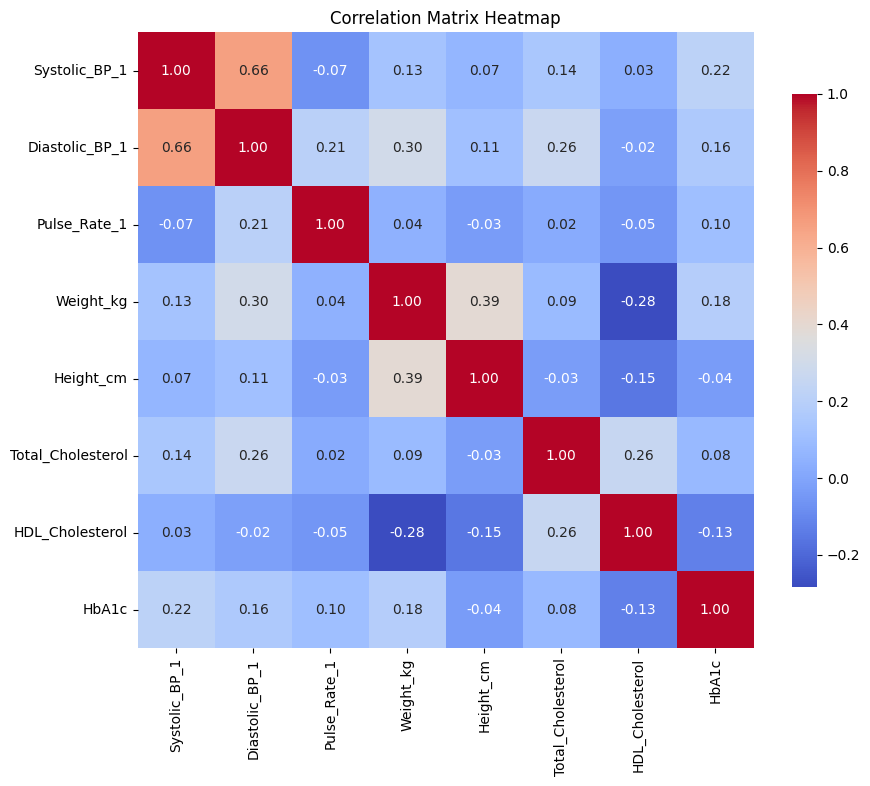

In [54]:
#heatmap & correlation matrix between all continuous variables 
corr_matrix = treated_df[continuous_vars + ['HbA1c']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()